# Data Visualisation of Horse Races Data

In this project, we will analyse the data visualisations for The Races

In [1]:
# Import tools/libaries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Horses dataset
horses = pd.read_csv('dataset/Horses.csv')

# View first 5 rows of dataset
horses.head()

,RaceID,HorseID,Cloth,Stall,WeightValue,JockeyID,AllowanceValue,OverweightValue,TrainerID,OwnerID,...,Going,Weather,Course_Distance,RaceType,TrackType,Handicap,eligibility,CourseID,MeetingDate,Won
0,989418,2963489,7,5.0,132,1398052.0,NaN,NaN,1198534,1289143.0,...,Good,Cloudy,1312,Flat,Turf,NaN,2YO only,380,02/05/2017,0
1,989418,2972665,13,6.0,132,1165412.0,NaN,NaN,1188128,1140080.0,...,Good,Cloudy,1312,Flat,Turf,NaN,2YO only,380,02/05/2017,0
2,989418,2972662,9,7.0,132,1239852.0,NaN,NaN,1199122,1448576.0,...,Good,Cloudy,1312,Flat,Turf,NaN,2YO only,380,02/05/2017,0
3,989418,2960365,1,12.0,132,1417524.0,NaN,NaN,1049637,1487690.0,...,Good,Cloudy,1312,Flat,Turf,NaN,2YO only,380,02/05/2017,1
4,989418,2968596,11,8.0,132,1354773.0,NaN,NaN,1140041,1403676.0,...,Good,Cloudy,1312,Flat,Turf,NaN,2YO only,380,02/05/2017,0


In [2]:
# View info of dataset
horses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36819 entries, 0 to 36818
Data columns (total 46 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RaceID              36819 non-null  int64  
 1   HorseID             36819 non-null  int64  
 2   Cloth               36819 non-null  int64  
 3   Stall               36615 non-null  float64
 4   WeightValue         36819 non-null  int64  
 5   JockeyID            36818 non-null  float64
 6   AllowanceValue      1609 non-null   float64
 7   OverweightValue     106 non-null    float64
 8   TrainerID           36819 non-null  int64  
 9   OwnerID             36616 non-null  float64
 10  LastRunDaysFlat     34300 non-null  float64
 11  Age                 36616 non-null  float64
 12  Blinkers            10342 non-null  float64
 13  Hood                0 non-null      float64
 14  Visor               68 non-null     float64
 15  EyeShield           0 non-null      float64
 16  Eyec

In [3]:
# View how many unique values there are under every column
horses.nunique()

RaceID                3000
HorseID               6064
Cloth                   30
Stall                   30
WeightValue             39
JockeyID               248
AllowanceValue           9
OverweightValue          5
TrainerID              160
OwnerID               3077
LastRunDaysFlat        384
Age                      9
Blinkers                90
Hood                     0
Visor                   16
EyeShield                0
Eyecover                 0
TongueStrap              0
CheekPieces              0
ForecastPrice           57
StatCourse               9
StatDistance             9
StatCourseDistance       7
StartingPrice           88
Bred                    13
DamID                 4181
SireID                 296
DamSireID              733
Sex                      5
Colour                   9
YearBorn                 7
MeetingID              344
RaceNumber              13
ScheduledTime            1
HorseCount              18
Runners                 17
Going                    7
W

#### First impressions of the dataset: 
- 36,819 entries/rows in dataset
- Many columns had null rows, with 5 columns containing no values in all its rows (Hood, EyeShield, EyeCover, TongueStrap, CheekPieces).
- This particular task did not require data cleaning. However if I had to perform data cleaning, I would have ensured columns which contained no values in its rows would be completely removed, OR missing data in certain column/rows would be filled (e.g. by using .fillna(), or replacing null values with the mean, median or mode). 
- 46 columns in dataset, so the .info() and .nunique() have helped me understand which columns could be most useful in a data visualisation. 


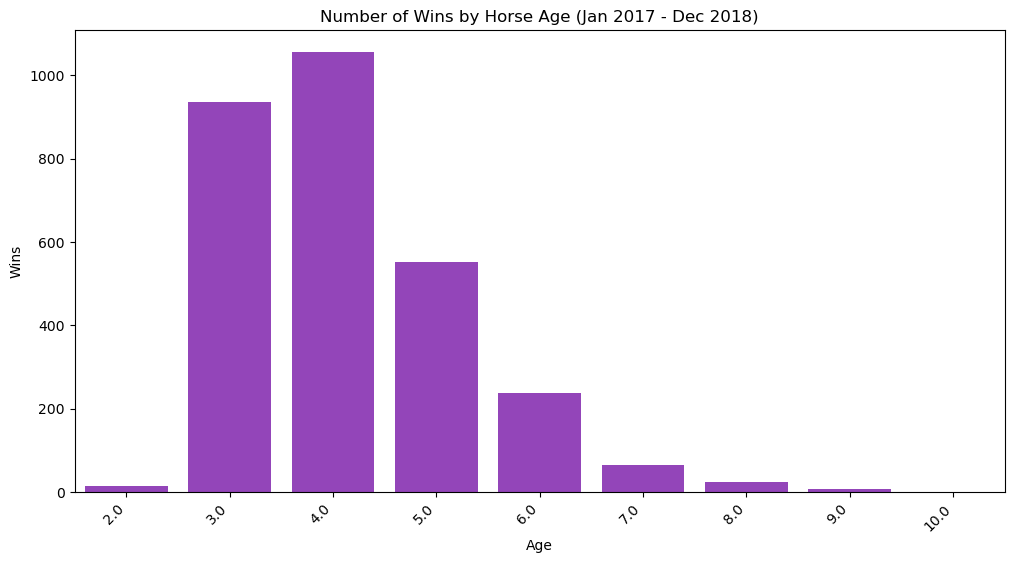

In [4]:
# Figure 1 - Number of wins by horse age

# Group by horse 'Age' and calculate the sum of wins for each age
wins_by_age = horses.groupby('Age')['Won'].sum().sort_values(ascending=False)
count_by_age = horses.groupby('Age')['HorseID'].count().sort_values(ascending=False)

# Make a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=wins_by_age.index, y=wins_by_age.values, color='darkorchid')
plt.title('Number of Wins by Horse Age (Jan 2017 - Dec 2018)')
plt.xlabel('Age')
plt.ylabel('Wins')
plt.xticks(rotation=45, ha='right')

#Show bar chart
plt.show()

#### Key summary:
- Horses who are aged 4 have the most wins. 
- As a horses age increases above 4, there is a downward slope indicating a sharp decrease in wins.

#### Limitations:
- Data does not mention if ‘Age’ is the horse’s age, but it can be assumed.


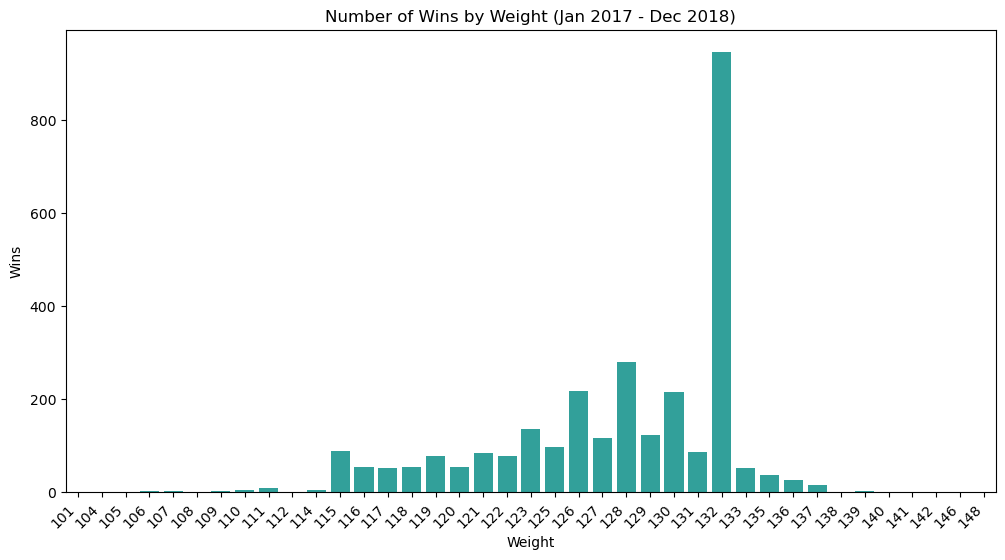

In [5]:
# Figure 2 - Number of wins by weight

# Group by 'WeightValue' and calculate the sum of wins for each weight category
wins_by_weight = horses.groupby('WeightValue')['Won'].sum().sort_values(ascending=False)
count_by_weight = horses.groupby('WeightValue')['HorseID'].count().sort_values(ascending=False)

# Make a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=wins_by_weight.index, y=wins_by_weight.values, color='lightseagreen')
plt.title('Number of Wins by Weight (Jan 2017 - Dec 2018)')
plt.xlabel('Weight')
plt.ylabel('Wins')
plt.xticks(rotation=45, ha='right')

#Show bar chart
plt.show()

#### Key summary:
- A weight value of 132 has the most wins.

#### Limitations: 
- Data does not specify what unit the ‘WeightValue’ is, nor does it mention if it is the horse’s weight or the jockey’s weight. (More likely to be jockey’s weight in pounds (lbs)). 


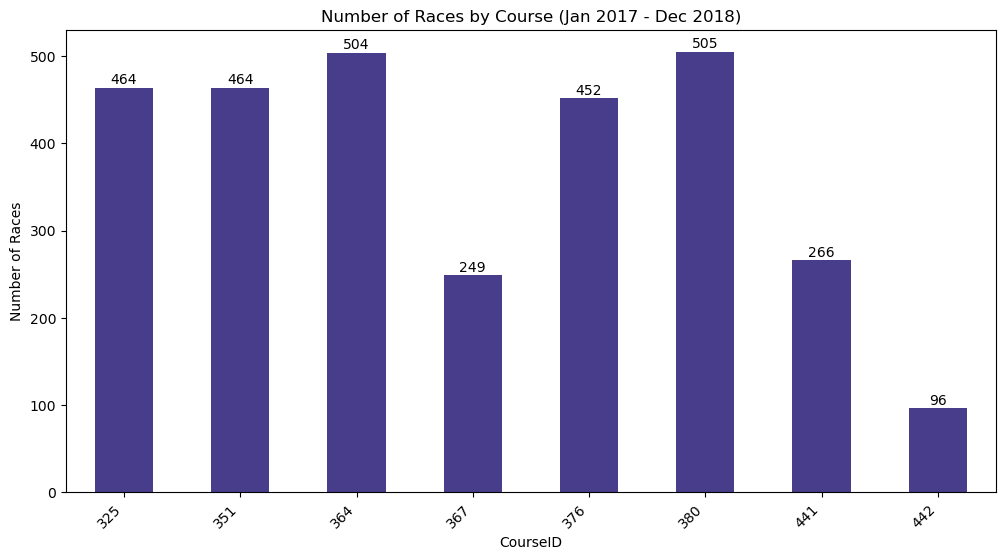

In [6]:
# Figure 3 - Number of races per course

# Group by 'CourseID' to get the count of 'RaceID's
races_per_course = horses.groupby('CourseID')['RaceID'].nunique()

# Create a bar chart
plt.figure(figsize=(12, 6))
bar_plot = races_per_course.plot(kind='bar', color='darkslateblue')
plt.xlabel('CourseID')
plt.ylabel('Number of Races')
plt.title('Number of Races by Course (Jan 2017 - Dec 2018)')
plt.xticks(rotation=45, ha='right')

# Add data labels to every bar
for index, value in enumerate(races_per_course):
    bar_plot.text(index, value + 1, str(value), ha='center', va='bottom', fontsize=10, color='black')

# Show bar chart
plt.show()

#### Key summary:
- Course ID 380 has had the most races within the time period Jan 2017 - Dec 2018. 


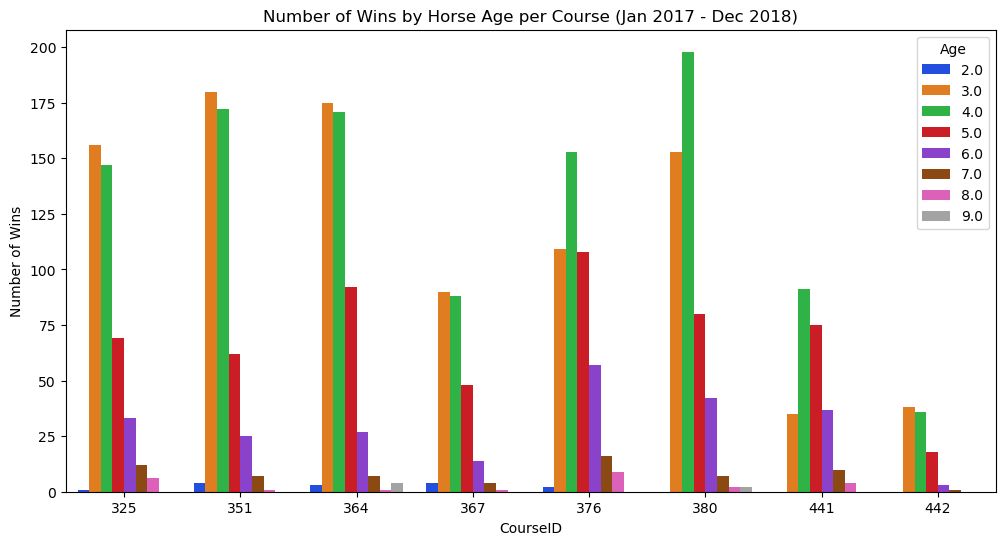

In [7]:
#Figure 4 - Numbers of wins by horse age per course

# Created a DataFrame with counts for each combination of Age, CourseID, and Wins
age_course_wins = horses.groupby(['Age', 'CourseID', 'Won']).size().reset_index(name='Count')

# Filter rows in 'Won' to 1 (a win)
age_course_wins = age_course_wins[age_course_wins['Won'] == 1]

# Create clustered bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='CourseID', y='Count', hue='Age', data=age_course_wins, palette='bright')
plt.title('Number of Wins by Horse Age per Course (Jan 2017 - Dec 2018)')
plt.xlabel('CourseID')
plt.ylabel('Number of Wins')

# Show clustered bar chart
plt.show()

#### Key summary:
- Clustered bar chart shows which horse age wins the most in which courses.
- Generally, horses aged 3 have won the most across several courses. For example, for Course IDs 325, 351, 364, 367 & 442, aged 3 horses have slightly outperformed aged 4 horses. 
- However, for Course IDs 376, 380 & 441, horses aged 4 are significantly outperforming other horses. 
- This shows why aged 4 horses from Figure 1 have won the most. 


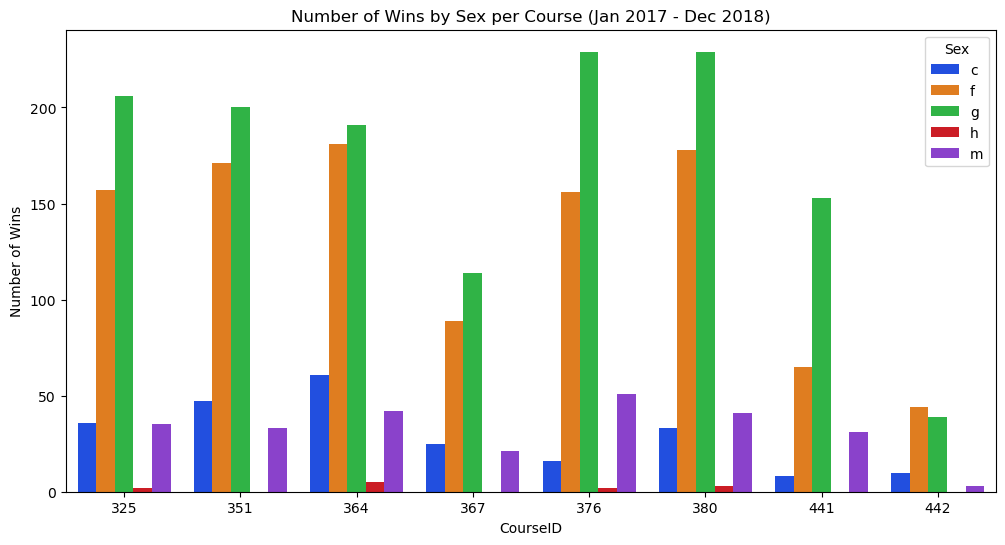

In [8]:
# Figure 5 - Number of wins by sex per course

# Created a DataFrame with counts for each combination of Sex, CourseID, and Wins
sex_course_wins = horses.groupby(['Sex', 'CourseID', 'Won']).size().reset_index(name='Count')

# Filter rows in 'Won' to 1 (a win)
sex_course_wins = sex_course_wins[sex_course_wins['Won'] == 1]

# Create clustered bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='CourseID', y='Count', hue='Sex', data=sex_course_wins, palette='bright')
plt.title('Number of Wins by Sex per Course (Jan 2017 - Dec 2018)')
plt.xlabel('CourseID')
plt.ylabel('Number of Wins')

# Show clustered bar chart
plt.show()

#### Key summary:
- Clustered bar chart shows which horse sex wins the most in which courses. 

#### Limitations:
- Not clear what each ‘Sex’ letter represents. Data did not include this information so it is difficult to determine what it is meant by the sex ‘g’ winning the most on several Course IDs. 


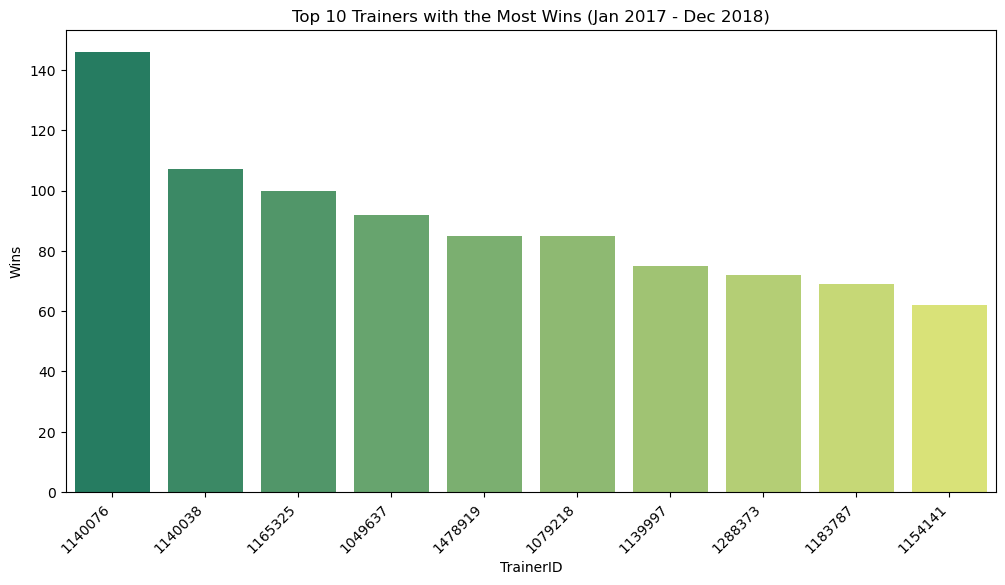

In [9]:
# Figure 6 - Top 10 Trainers with the Most Wins

# Calculate the sum of wins for each TrainerID
wins_by_trainer = horses.groupby('TrainerID')['Won'].sum().sort_values(ascending=False)

# Select the top 10 trainers with the most wins
top_10_trainers = wins_by_trainer.head(10)

# Make bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_trainers.index, y=top_10_trainers.values, order=top_10_trainers.index, palette='summer')
plt.title('Top 10 Trainers with the Most Wins (Jan 2017 - Dec 2018)')
plt.xlabel('TrainerID')
plt.ylabel('Wins')
plt.xticks(rotation=45, ha='right')

# Show bar chart
plt.show()

#### Key summary:
- Trainer ID-1140076 has had the most wins.
- This could be a valuable insight for horse owners who are in need of a new trainer and want their horse to win. 
- Only top 10 trainers are shown due to the thousands of ‘TrainerID’ in the dataset. If anything, this is more valuable data than knowing who is lower down in the ranks.

#### Limitations:
- This graph does not take into consideration the number of races the trainer has been involved in. This might provide an indication of win rate (%). 


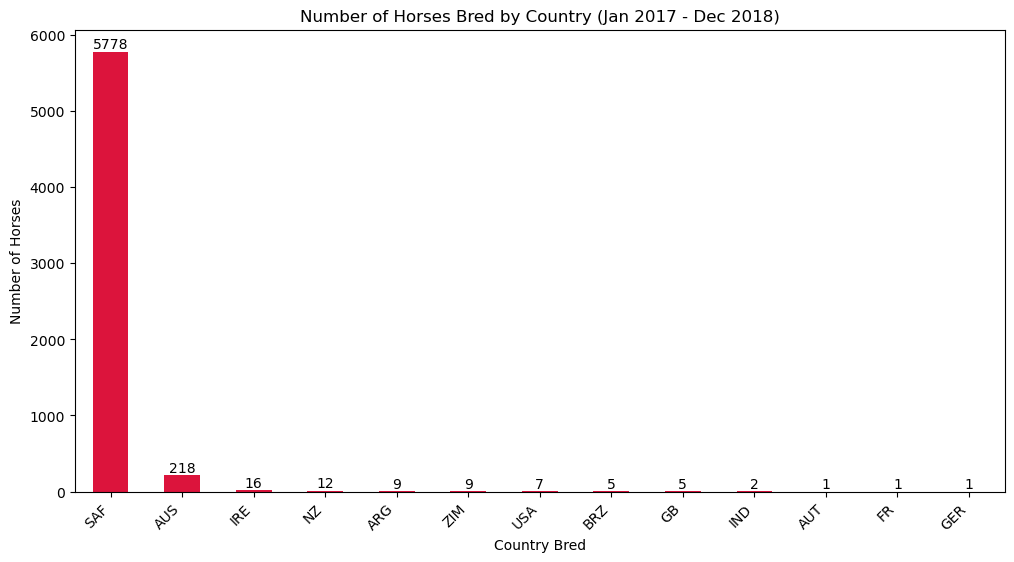

In [10]:
# Figure 7 - Number of Horses Bred by Country

# Group by Country 'Bred' to get the count of unique 'HorseID'
horses_per_country = horses.groupby('Bred')['HorseID'].nunique().sort_values(ascending=False)

# Create a bar chart
plt.figure(figsize=(12, 6))
bar_plot = horses_per_country.plot(kind='bar', color='crimson')
plt.xlabel('Country Bred')
plt.ylabel('Number of Horses')
plt.title('Number of Horses Bred by Country (Jan 2017 - Dec 2018)')
plt.xticks(rotation=45, ha='right')  

# Add data labels to every bar
for index, value in enumerate(horses_per_country):
    bar_plot.text(index, value + 1, str(value), ha='center', va='bottom', fontsize=10, color='black')

# Show bar chart
plt.show()

#### Key summary:
- Most horses are bred from South Africa in this dataset.
- Could mean that the horse races are happening in South Africa. 

#### Limitations:
- Not enough data to confirm if the horse races are happening in South Africa.


C:\Users\polin\AppData\Local\Temp\ipykernel_18224\3233484458.py:4: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  horses['MeetingDate'] = pd.to_datetime(horses['MeetingDate'])


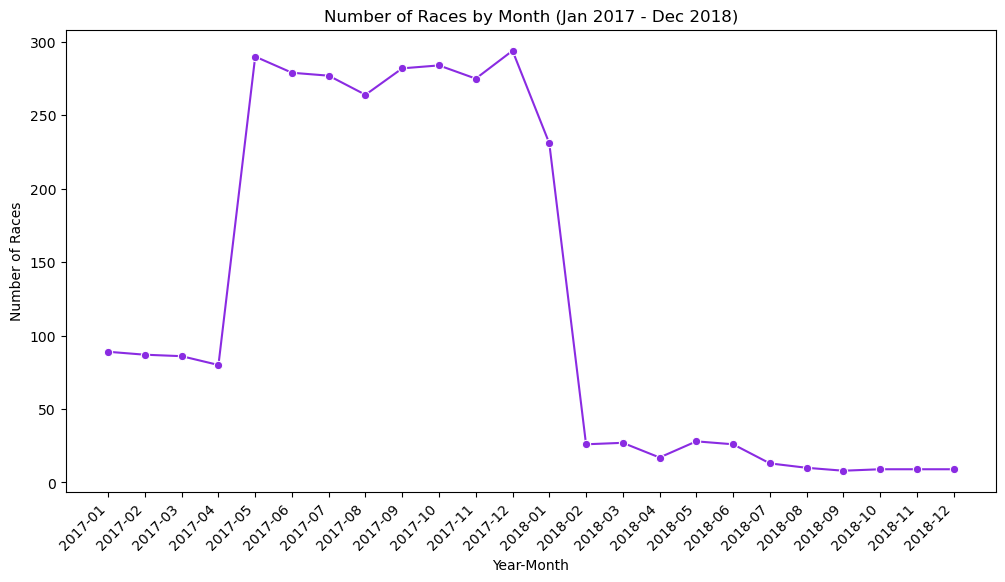

In [11]:
# Figure 8 - Number of races by month

# Convert 'MeetingDate' to datetime format
horses['MeetingDate'] = pd.to_datetime(horses['MeetingDate'])

# Get the month and year from 'MeetingDate'
horses['MonthYear'] = horses['MeetingDate'].dt.to_period('M')

# Group by 'MonthYear' and calculate the count of unique 'RaceID' for each month
races_by_month = horses.groupby('MonthYear')['RaceID'].nunique()

# Make line graph
plt.figure(figsize=(12, 6))
sns.lineplot(x=races_by_month.index.astype(str), y=races_by_month.values, marker='o', color='blueviolet')
plt.title('Number of Races by Month (Jan 2017 - Dec 2018)')
plt.xlabel('Year-Month')
plt.ylabel('Number of Races')
plt.xticks(rotation=45, ha='right')

# Show line graph
plt.show()

#### Key summary:
- Sharp increase of horse races happening from May 2017. 
- Number of horse races start to decrease from Jan 2018. 
- Not clear as to why number of races have significantly dropped (Not due to seasons.)

#### Limitations:
- The number of races from 2017 to 2018 doesn’t show a pattern. This means data could be missing, or there is a another factor which affected the horse races. 
